In [2]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.8/150.8 MB 7.2 MB/s eta 0:00:00:00:0100:01


In [3]:
import torch

In [4]:
print(torch.__version__)

2.2.2


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
X = torch.tensor([[1,0,1,0],[1,0,1,1],[0,1,0,1]],dtype=torch.float)
X

tensor([[1., 0., 1., 0.],
        [1., 0., 1., 1.],
        [0., 1., 0., 1.]])

In [10]:
y = torch.tensor([[1],[1],[0]], dtype=torch.float)
y

tensor([[1.],
        [1.],
        [0.]])

In [11]:
X = X.t()

In [12]:
y = y.t()

In [14]:
print(X.shape,y.shape)

torch.Size([4, 3]) torch.Size([1, 3])


In [15]:
input_layer_neurons = X.shape[0]
hidden_layer_neurons = 3
output_neurons = 1

In [17]:
w_ih = torch.randn(input_layer_neurons,hidden_layer_neurons)
w_ho = torch.randn(hidden_layer_neurons,output_neurons)

In [19]:
def sigmoid(s):
    return 1/(1+torch.exp(-s))

In [20]:
hidden_layer_input = torch.matmul(w_ih.t(),X)
hidden_layer_activations = sigmoid(hidden_layer_input)

In [21]:
output_layer_input = torch.matmul(w_ho.t(),hidden_layer_activations)
output = sigmoid(output_layer_input)

In [22]:
output

tensor([[0.8343, 0.8728, 0.7651]])

In [23]:
error = torch.pow(output-y,2)/2

In [24]:
error_wrt_output = -(y-output)
output_wrt_z2 = torch.mul(output,(1-output))
z2_wrt_who = hidden_layer_activations

In [25]:
error_wrt_who = torch.matmul(z2_wrt_who,(error_wrt_output*output_wrt_z2).t())

In [26]:
z2_wrt_h1 = w_ho
h1_wrt_z1 = torch.mul(hidden_layer_activations,(1-hidden_layer_activations))
z1_wrt_wih= X

In [27]:
error_wrt_wih = torch.matmul(z1_wrt_wih,(h1_wrt_z1*torch.matmul(z2_wrt_h1,(output_wrt_z2*error_wrt_output))).t())

In [28]:
lr = 0.01

In [29]:
w_ho = w_ho - lr * error_wrt_who

In [30]:
w_ih = w_ih - lr * error_wrt_wih

In [31]:
# defining the model architecture
inputlayer_neurons = X.shape[0] # number of features in data set
hiddenlayer_neurons = 3 # number of hidden layers neurons
output_neurons = 1 # number of neurons at output layer

# initializing weight
w_ih=torch.randn(inputlayer_neurons,hiddenlayer_neurons, dtype=torch.float)
w_ho=torch.randn(hiddenlayer_neurons,output_neurons, dtype=torch.float)

# defining the parameters
lr = 0.01
epochs = 10000

In [32]:
error_epoch = []
for i in range(epochs):
    # Forward Propogation
    
    # hidden layer activations
    hidden_layer_input= torch.matmul(w_ih.t(),X)
    hiddenlayer_activations = sigmoid(hidden_layer_input)    
    # calculating the output
    output_layer_input= torch.matmul(w_ho.t(),hiddenlayer_activations)
    output = sigmoid(output_layer_input)
    
    
    # Backward Propagation
    
    # calculating error
    error = (y-output)*(y-output)/2
    error_wrt_output = -(y-output)
    output_wrt_Z2 = torch.mul(output,(1-output))
    Z2_wrt_who = hiddenlayer_activations
    # rate of change of error w.r.t weight between hidden and output layer
    error_wrt_who =  torch.matmul(Z2_wrt_who,(error_wrt_output*output_wrt_Z2).t())
    Z2_wrt_h1 = w_ho
    h1_wrt_Z1 = torch.mul(hiddenlayer_activations,(1-hiddenlayer_activations))
    Z1_wrt_wih = X
    # rate of change of error w.r.t weights between input and hidden layer
    error_wrt_wih =  torch.matmul(Z1_wrt_wih,(h1_wrt_Z1*torch.matmul(Z2_wrt_h1,(error_wrt_output*output_wrt_Z2))).t())

    # updating the weights between hidden and output layer
    w_ho = w_ho - lr * error_wrt_who
    # updating the weights between input and hidden layer
    w_ih = w_ih - lr * error_wrt_wih
    
    # appending the error of each epoch
    error_epoch.append(torch.mean(error))

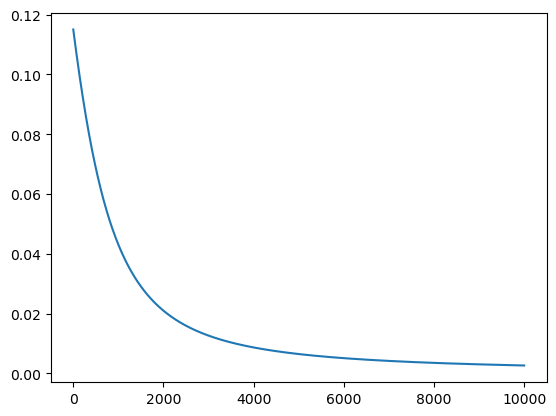

In [33]:
# visualizing the error after each epoch
plt.plot(torch.arange(1,epochs+1).numpy(), torch.Tensor(error_epoch).numpy())

In [34]:
output

tensor([[0.9629, 0.9277, 0.0953]])

In [35]:
y

tensor([[1., 1., 0.]])

In [36]:
error

tensor([[0.0007, 0.0026, 0.0045]])